## Import helper functions and predictive model

In [1]:
from utils.invoice_selection import * 
import time
import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Read the test dataset

In [2]:
df=pd.read_pickle('data/invoice.pkl').drop(['Participation Date','SUPP_ID','Supplier Category'],axis=1) #read the test dataset

In [9]:
df=pd.read_pickle('data/invoice.pkl').drop('Participation Date',axis=1) #read the test dataset

## Create a predictor object

In [10]:
predictor=fit_for_auction_check()

## Preprocess the test data:
### Preprocessing steps:
<ul>
<li>Converting dates to datetime dtype</li>
<li>Dropping irrelevant columns for predicting participation for an invoice at auction.</li>
<li>Irrelevant Columns : [ 'CUST_ID' , 'INV_ID' , 'Auction Created?' , 'AUCTION_ID' ]</li>
<li>Calculating time left till "Original Invoice Pay Schedule Date"</li>
<li>Drop all the rows with -ve invoice values and invoices loaded post Pay Schedule date</li>
<li>Transforming date variables to 'day of year','month of 'year','day_of_week', etc</li>
<li>Convert non floating point variables to CATEGORICAL</li>
<li>Normalizing continuous variables</li>
</ul>


In [11]:
df_proc,discarded=predictor.preprocess(df)

## Predicting with the savel RF model
 Predict method will handle test data with or without the supplier information. With supplier info (SUPP_ID,Supplier Category) a different model will be called and with supplier info a different model will be called for prediction.

In [12]:
predicted_df,model=predictor.predict(df_proc)

In [13]:
predicted_df.head()

,INV_ID,Participation_probability,Predicted_Participation
0,Inv ID_1,1.0,True
1,Inv ID_2,1.0,True
2,Inv ID_3,1.0,True
3,Inv ID_4,1.0,True
4,Inv ID_5,1.0,True


### Predicted_df stores the participation probability and particiation decision for test data.
### Discarded dataframe has all the invalid rows that were dropped.

In [ ]:
ts = time.strftime("%Y%m%d-%H%M%S")
predicted_df.to_csv(f'prediction_{ts}.csv')
discarded.to_csv(f'discarded_{ts}.csv')

## Feature importance interpretation for participation with supplier data

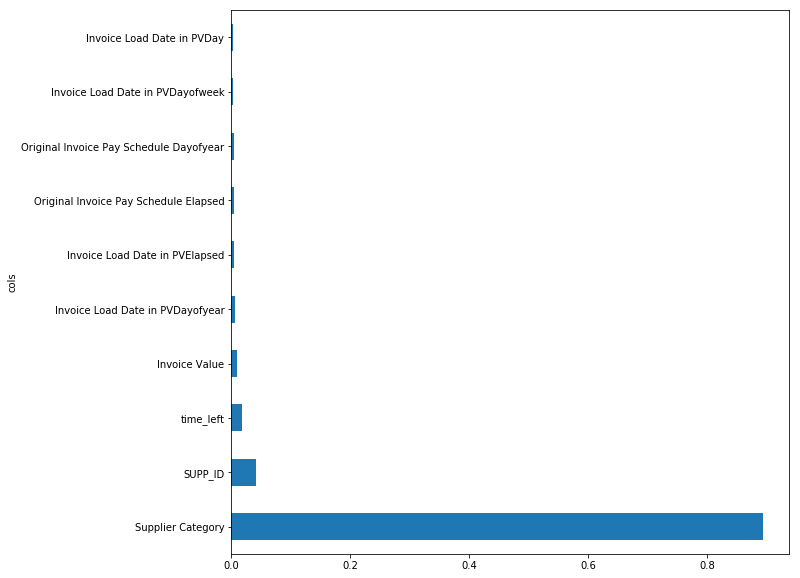

In [14]:
fi = rf_feat_importance(model, df_proc); drop_cols=list(fi[10:].cols)
fi[:10].plot('cols', 'imp', kind='barh',figsize=(10,10), legend=False);

## Feature importance interpretation for participation without supplier data

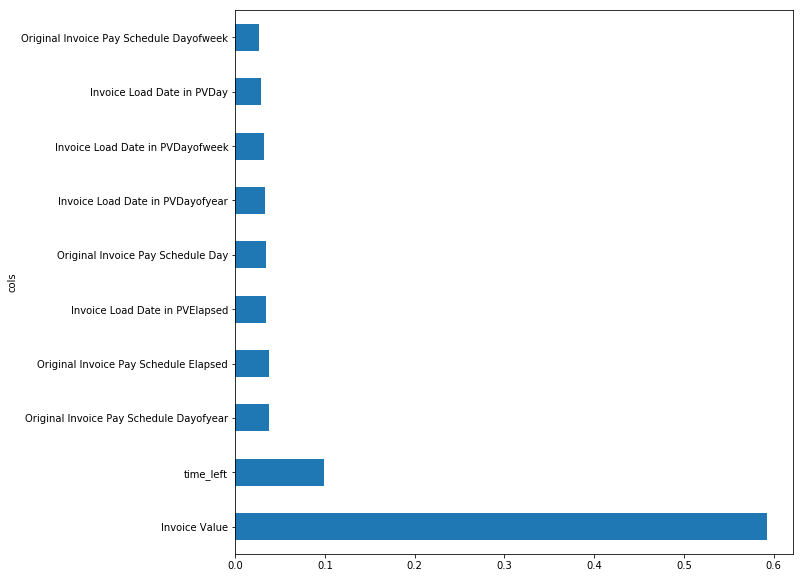

In [8]:
fi = rf_feat_importance(model, df_proc); drop_cols=list(fi[10:].cols)
fi[:10].plot('cols', 'imp', kind='barh',figsize=(10,10), legend=False);